In [ ]:
# Import de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import glob
import polars as pl
import timeit

In [ ]:
# path a los archivos parquet
files = glob.glob("../dataset/*.parquet")

# leer .parquet files y concatenar en un solo df 
df = pd.concat([pd.read_parquet(f) for f in files], ignore_index=True)

print(len(files), "files merged")
print(df.shape)

# Formato de visualización de floats en pandas
pd.set_option('display.float_format', '{:.2f}'.format)


12 files merged
(41169720, 19)


In [34]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.00,1.72,1.00,N,186,79,2,17.70,1.00,0.50,0.00,0.00,1.00,22.70,2.50,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.00,1.80,1.00,N,140,236,1,10.00,3.50,0.50,3.75,0.00,1.00,18.75,2.50,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.00,4.70,1.00,N,236,79,1,23.30,3.50,0.50,3.00,0.00,1.00,31.30,2.50,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.00,1.40,1.00,N,79,211,1,10.00,3.50,0.50,2.00,0.00,1.00,17.00,2.50,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.00,0.80,1.00,N,211,148,1,7.90,3.50,0.50,3.20,0.00,1.00,16.10,2.50,0.00


In [35]:

df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,41169720.00,41169720,41169720,37078488.00,41169720.00,37078488.00,41169720.00,41169720.00,41169720.00,41169720.00,41169720.00,41169720.00,41169720.00,41169720.00,41169720.00,41169720.00,37078488.00,37078488.00
mean,1.76,2024-07-06 10:01:25.051412,2024-07-06 10:18:53.125903,1.33,4.98,2.32,164.24,163.45,1.11,19.27,1.39,0.48,3.31,0.56,0.96,27.83,2.23,0.15
min,1.00,2002-12-31 16:46:07,2002-12-31 17:24:07,0.00,0.00,1.00,1.00,1.00,0.00,-2261.20,-9.25,-0.50,-300.00,-140.63,-1.00,-2265.45,-2.50,-1.75
25%,2.00,2024-04-06 20:07:27.500000,2024-04-06 20:23:52,1.00,1.01,1.00,132.00,113.00,1.00,9.30,0.00,0.50,0.00,0.00,1.00,15.75,2.50,0.00
50%,2.00,2024-07-03 23:35:15,2024-07-03 23:50:35,1.00,1.76,1.00,161.00,162.00,1.00,13.50,1.00,0.50,2.60,0.00,1.00,21.00,2.50,0.00
75%,2.00,2024-10-08 17:33:35,2024-10-08 17:53:27.250000,1.00,3.36,1.00,233.00,234.00,1.00,22.60,2.50,0.50,4.25,0.00,1.00,30.60,2.50,0.00
max,7.00,2026-06-26 23:53:12,2026-06-27 20:59:10,9.00,398608.62,99.00,265.00,265.00,5.00,335544.44,65.99,41.30,999.99,1702.88,2.00,335550.94,2.52,1.75
std,0.43,NaN,NaN,0.82,419.23,10.93,64.34,69.60,0.65,76.72,1.82,0.13,4.09,2.24,0.26,78.05,0.87,0.50


In [37]:
# print tipo de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41169720 entries, 0 to 41169719
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [38]:
# nulos Expresado en porcentual y en absoluto
nulos_percent = df.isnull().mean() * 100
nulos_absolute = df.isnull().sum()
nulos_df = pd.DataFrame({'Nulos Absoluto': nulos_absolute, 'Nulos Porcentual': nulos_percent})
print(nulos_df)

                       Nulos Absoluto  Nulos Porcentual
VendorID                            0              0.00
tpep_pickup_datetime                0              0.00
tpep_dropoff_datetime               0              0.00
passenger_count               4091232              9.94
trip_distance                       0              0.00
RatecodeID                    4091232              9.94
store_and_fwd_flag            4091232              9.94
PULocationID                        0              0.00
DOLocationID                        0              0.00
payment_type                        0              0.00
fare_amount                         0              0.00
extra                               0              0.00
mta_tax                             0              0.00
tip_amount                          0              0.00
tolls_amount                        0              0.00
improvement_surcharge               0              0.00
total_amount                        0           

<Axes: >

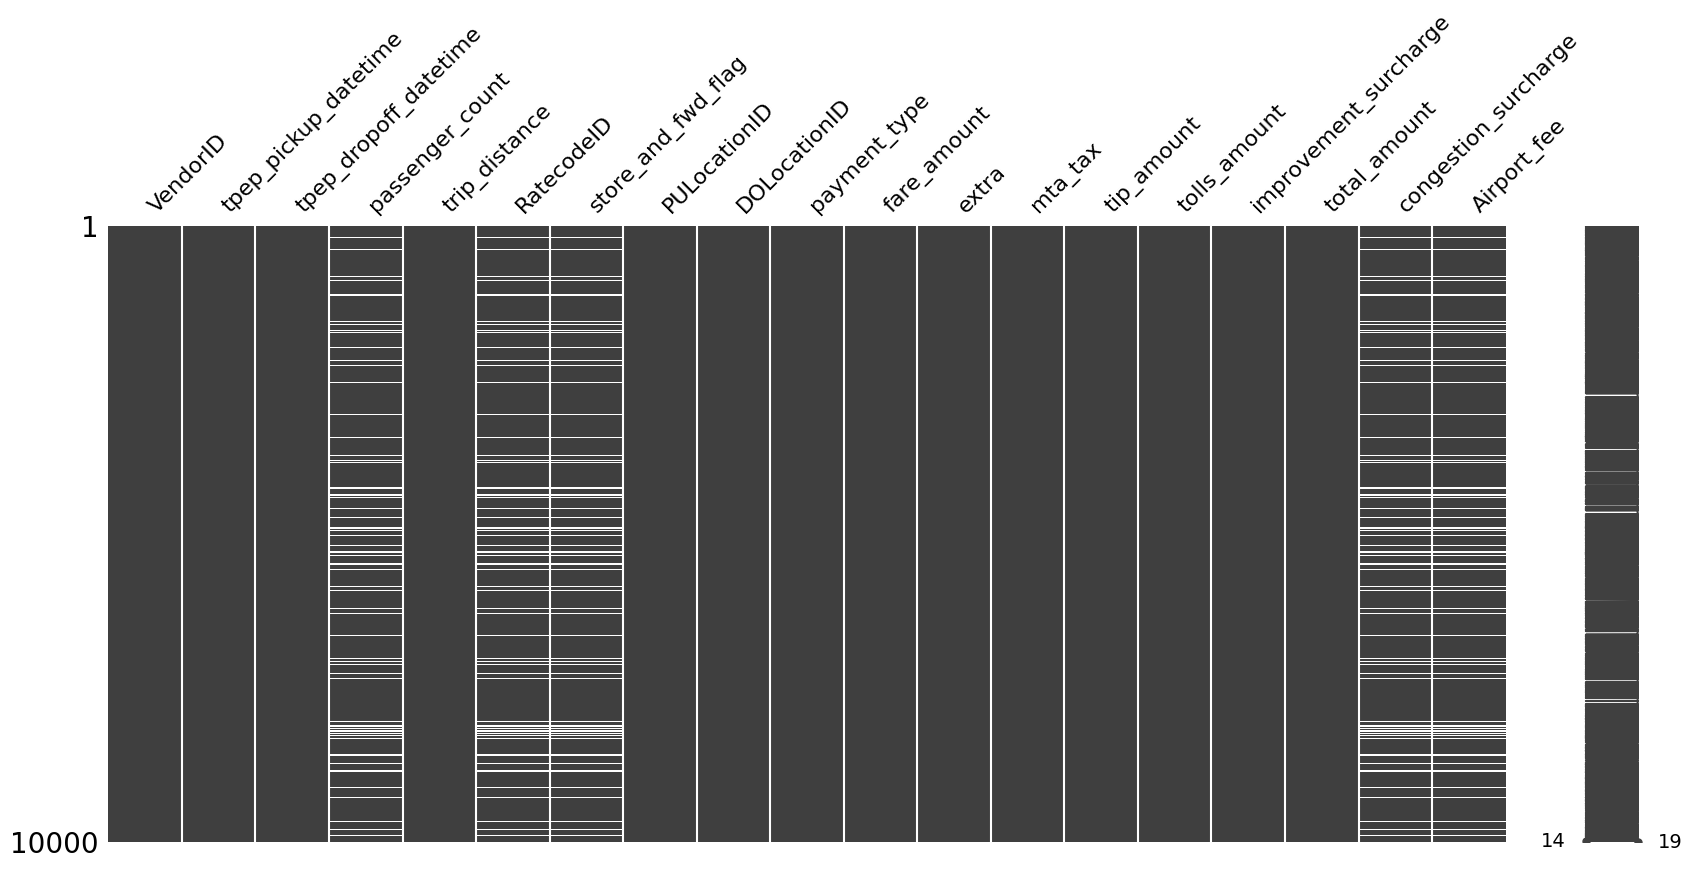

In [42]:
# Matriz de valores faltantes
msno.matrix(df.sample(10000, random_state=42), figsize=(20, 8))

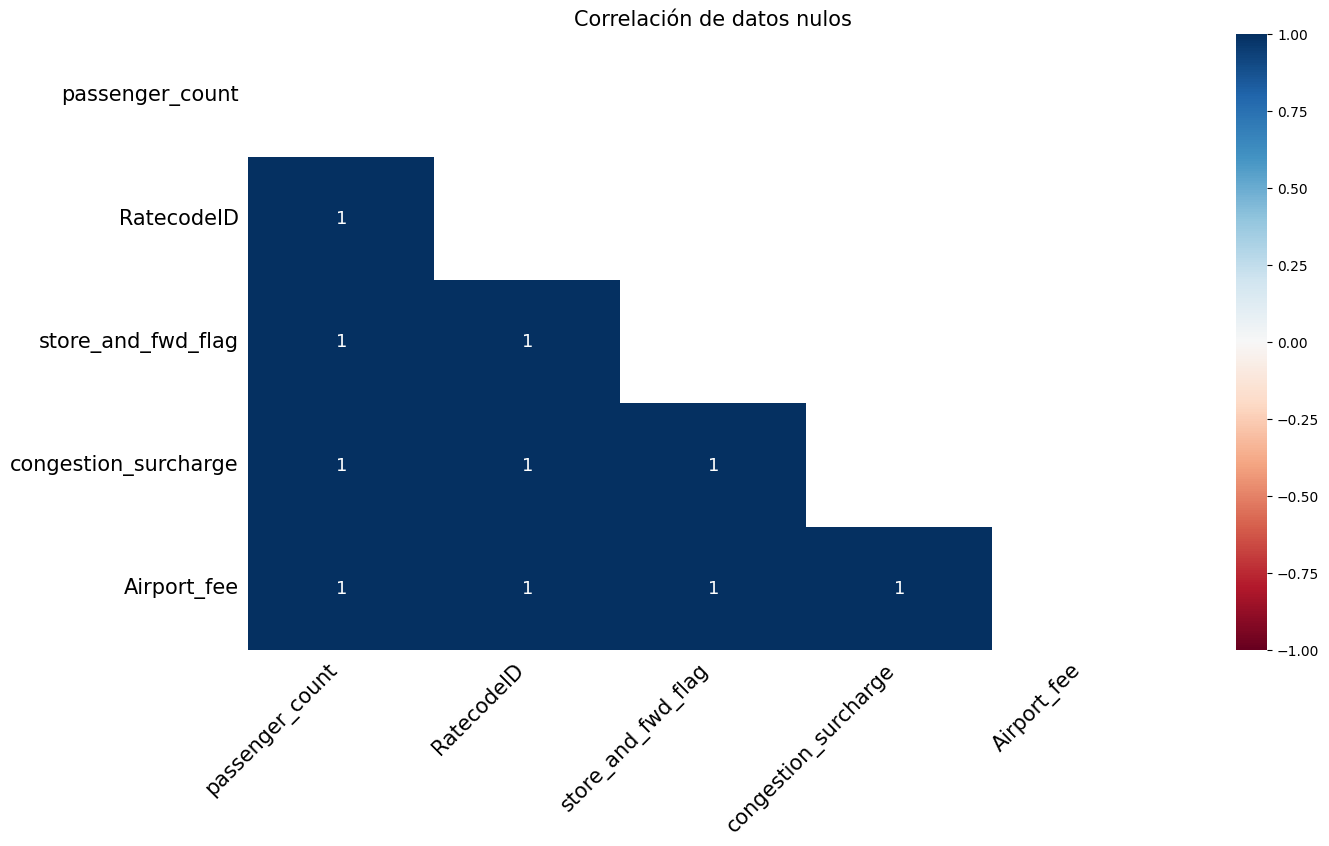

In [43]:
msno.heatmap(df, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

In [44]:
# Si bien supuestamente tenemos solo esos nulos que se ven ahi, tenemos que tener en cuenta que segun la descripcion del dataset también se debe tener en cuenta que: 
# Para RatecodeID: 99 es Unknown/Null
# Para payment_type: 5 es Unknown/Null
# Convertimos esos valores a NaN
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)
df['payment_type'] = df['payment_type'].replace(5, np.nan)

In [45]:
# obtener valores unicos de payment type
print(df['payment_type'].unique())
# nans 
print(df['payment_type'].isnull().sum())

[ 2.  1.  4.  3.  0. nan]
4


In [46]:
# nulos Expresado en porcentual y en absoluto
nulos_percent = df.isnull().mean() * 100
nulos_absolute = df.isnull().sum()
nulos_df = pd.DataFrame({'Nulos Absoluto': nulos_absolute, 'Nulos Porcentual': nulos_percent})
print(nulos_df)

                       Nulos Absoluto  Nulos Porcentual
VendorID                            0              0.00
tpep_pickup_datetime                0              0.00
tpep_dropoff_datetime               0              0.00
passenger_count               4091232              9.94
trip_distance                       0              0.00
RatecodeID                    4558206             11.07
store_and_fwd_flag            4091232              9.94
PULocationID                        0              0.00
DOLocationID                        0              0.00
payment_type                        4              0.00
fare_amount                         0              0.00
extra                               0              0.00
mta_tax                             0              0.00
tip_amount                          0              0.00
tolls_amount                        0              0.00
improvement_surcharge               0              0.00
total_amount                        0           

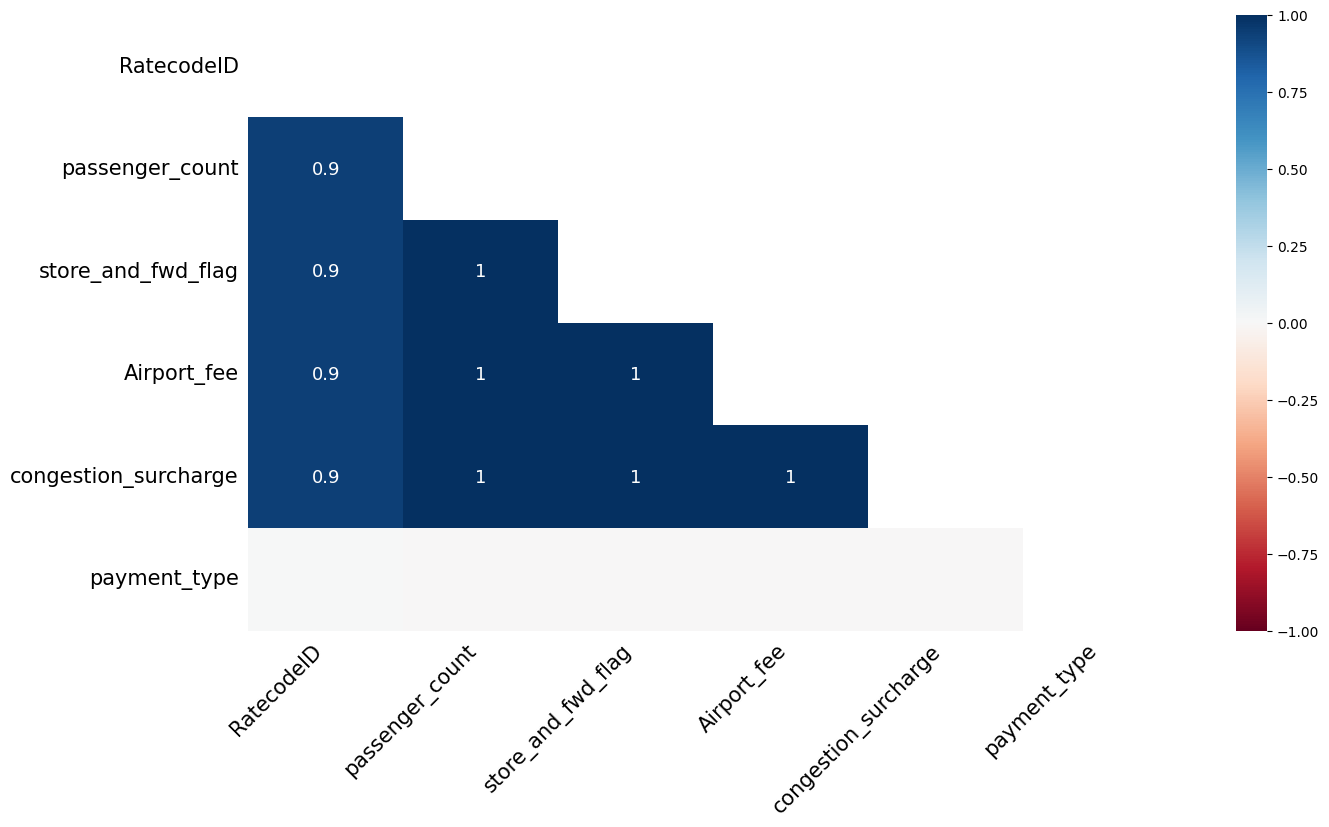

In [ ]:
# Calcular cantidad de NaN por columna
missing_counts = df.isna().sum()
# Ordenar columnas: primero las con más NaN, al final las con menos
sorted_cols = missing_counts.sort_values(ascending=False).index.tolist()
# Reordenar DataFrame
df_sorted = df[sorted_cols]

# Graficar heatmap con el nuevo orden
fig, ax = plt.subplots(figsize=(15, 8))
msno.heatmap(df_sorted, fontsize=15, ax=ax)

# Opcional: cambiar color del texto dentro de las celdas
for text in ax.texts:
    text.set_color("white")

plt.show()

In [48]:
'''
Verificar si columna "store_and_fwd_flag" tiene valores distintos a 'Y' y 'N' si no, 
se cambia a tipo booleano
'''
print(df['store_and_fwd_flag'].value_counts())

# Como es solo 'Y' y 'N', se cambia a booleano
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': True, 'N': False})
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('boolean')
# Verificamos el cambio
df.info()

store_and_fwd_flag
N    36903316
Y      175172
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41169720 entries, 0 to 41169719
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     boolean       
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64   